### Simple LLM graph

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv()
llm = ChatOpenAI(model = "gpt-4.1-nano", temperature=0)

In [3]:
# Define state
class QAState(TypedDict):
    question: str
    answer: str

In [17]:
def answer_question(state: QAState) -> QAState:

    # extract question from the state
    question = state['question']

    # create a prompt
    prompt = f"Answer the question: {question}"

    # invoke the LLM
    answer = llm.invoke(prompt).content

    # update the state
    state['answer'] = answer

    # return the state
    return state

In [18]:
# Define graph
graph = StateGraph(QAState)

# step 1: add nodes to graph
graph.add_node('answer_question', answer_question)

# step 2: add edges to graph
graph.add_edge(START, 'answer_question')
graph.add_edge('answer_question', END)

# step 3: compile the graph
workflow = graph.compile()

In [19]:
# step 4: run the workflow
initial_state = {'question': 'How far is the Moon from the Earth?'}
final_state = workflow.invoke(initial_state)
print(final_state)

{'question': 'How far is the Moon from the Earth?', 'answer': 'The average distance from the Moon to the Earth is approximately 384,400 kilometers (about 238,855 miles).'}


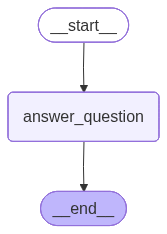

In [20]:
# To visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())